In [1]:
import numpy as np 
import pandas as pd 

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nmt-results-rnn-gru-lstm-transformer/rnn_training_results.csv
/kaggle/input/nmt-results-rnn-gru-lstm-transformer/lstm_training_results.csv
/kaggle/input/nmt-results-rnn-gru-lstm-transformer/transformer_training_results.csv
/kaggle/input/nmt-results-rnn-gru-lstm-transformer/evaluation_results.csv
/kaggle/input/nmt-results-rnn-gru-lstm-transformer/gru_training_results.csv


In [2]:
# Đường dẫn đến các file CSV
base_path = "/kaggle/input/nmt-results-rnn-gru-lstm-transformer/"
files = {
    "RNN Training Results": "rnn_training_results.csv",
    "GRU Training Results": "gru_training_results.csv",
    "LSTM Training Results": "lstm_training_results.csv",
    "Transformer Training Results": "transformer_training_results.csv",
    "Evaluation Results": "evaluation_results.csv"
}

# Đọc và hiển thị từng bảng
for title, filename in files.items():
    print(f"\n=== {title} ===")
    df = pd.read_csv(base_path + filename)
    display(df.head())


=== RNN Training Results ===


,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1,6.1909,5.5365,0.1496,0.2008
1,2,5.1217,4.8460,0.2589,0.3264
2,3,3.7188,3.1528,0.4635,0.5313
3,4,2.1520,2.1920,0.6467,0.6481
4,5,1.3691,1.5795,0.7189,0.7063



=== GRU Training Results ===


,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1,5.0700,3.0347,0.2908,0.5162
1,2,1.9398,1.5871,0.6514,0.6993
2,3,1.0666,1.1206,0.7744,0.7734
3,4,0.6949,0.8731,0.8353,0.8142
4,5,0.4954,0.7814,0.8759,0.8325



=== LSTM Training Results ===


,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1,5.0148,1.9644,0.3118,0.6678
1,2,1.5124,1.2519,0.7275,0.7657
2,3,0.8263,0.7109,0.8185,0.8387
3,4,0.4863,0.6016,0.8714,0.8558
4,5,0.3786,0.5736,0.8937,0.8610



=== Transformer Training Results ===


,Epoch,Train Loss,Val Loss,Train Accuracy,Val Accuracy
0,1,1.1965,0.5842,0.7878,0.8869
1,2,0.6247,0.4819,0.8731,0.9063
2,3,0.5220,0.4305,0.8925,0.9161
3,4,0.4614,0.3919,0.9044,0.9239
4,5,0.4276,0.3758,0.9111,0.9272



=== Evaluation Results ===


,Model,Decoding,BLEU,CHRF
0,RNN,Greedy,46.06,66.50
1,RNN,Beam,49.67,68.52
2,GRU,Greedy,62.11,69.42
3,GRU,Beam,63.46,70.91
4,LSTM,Greedy,63.76,72.35


In [3]:
import matplotlib.pyplot as plt

# Loại bỏ Evaluation khỏi danh sách vẽ biểu đồ
training_files = {k: v for k, v in files.items() if k != "Evaluation Results"}

# Đọc dữ liệu vào dictionary
data = {name: pd.read_csv(base_path + fname) for name, fname in training_files.items()}

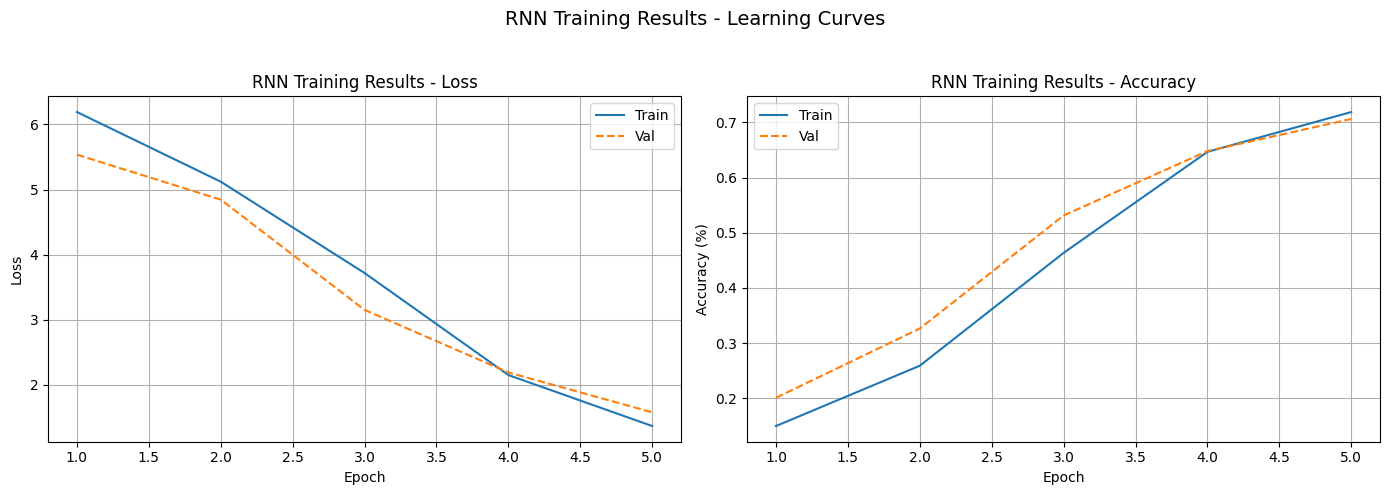

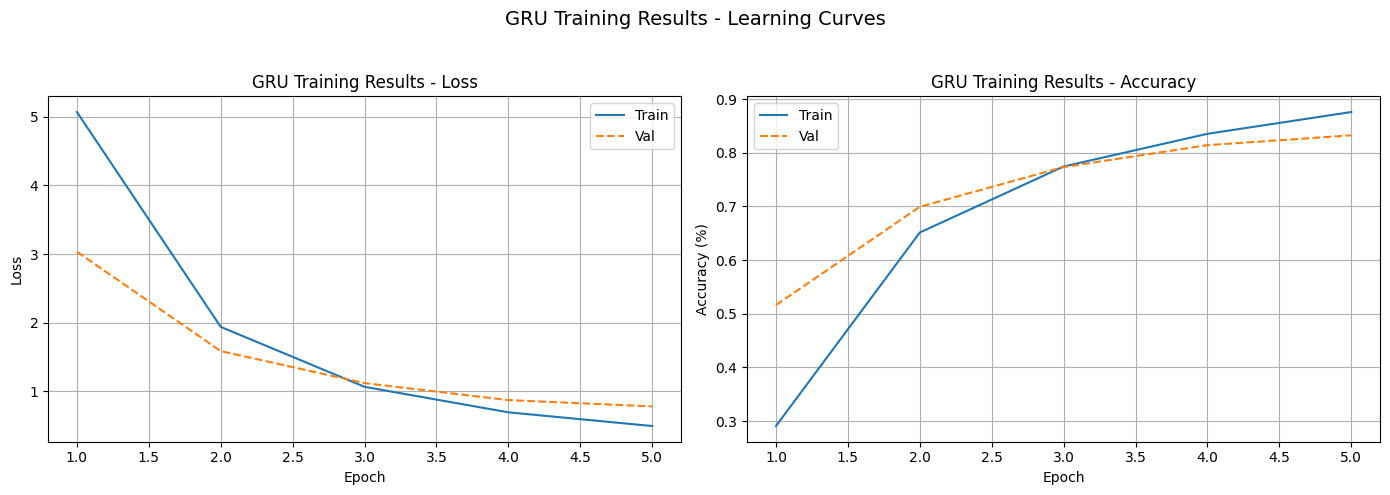

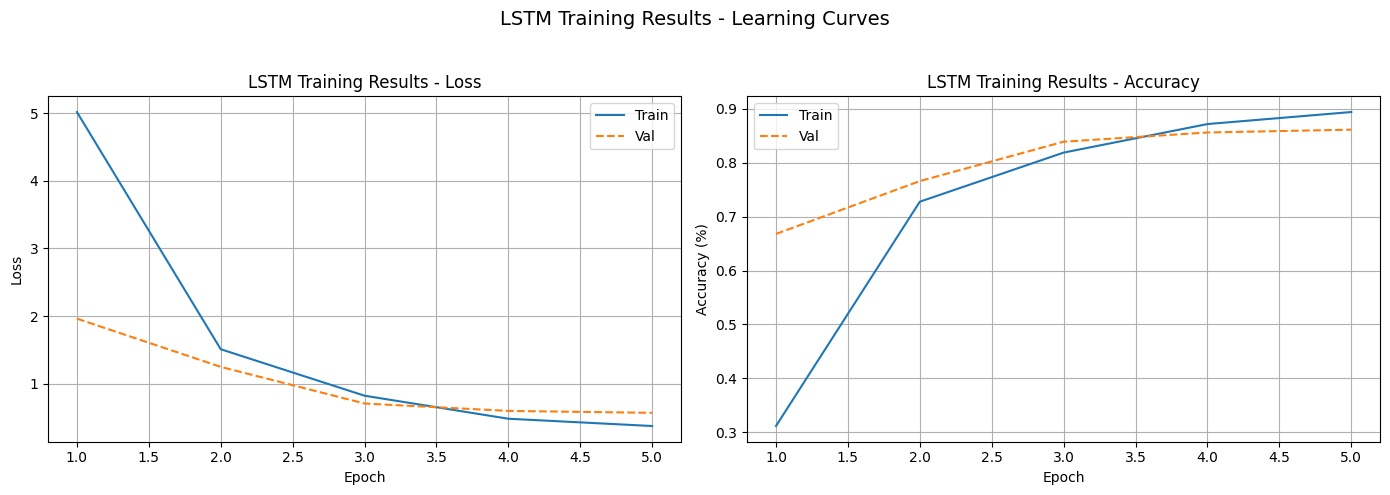

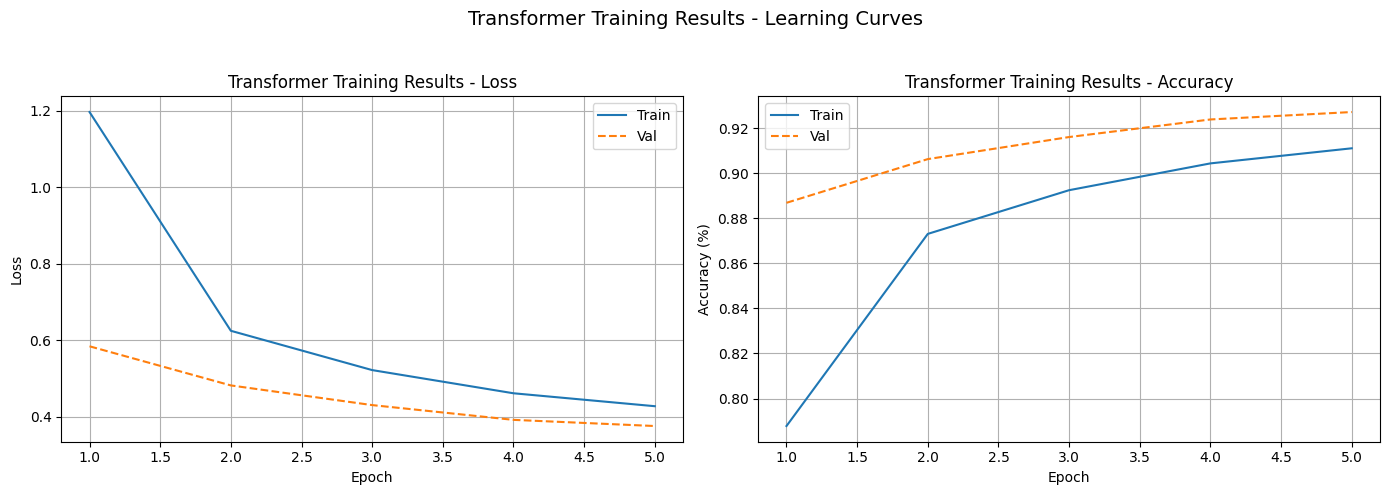

In [4]:
for name, df in data.items():
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Loss subplot
    axes[0].plot(df['Epoch'], df['Train Loss'], label="Train", linestyle='-')
    axes[0].plot(df['Epoch'], df['Val Loss'], label="Val", linestyle='--')
    axes[0].set_title(f"{name} - Loss")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[0].grid(True)
    axes[0].legend()

    # Accuracy subplot
    axes[1].plot(df['Epoch'], df['Train Accuracy'], label="Train", linestyle='-')
    axes[1].plot(df['Epoch'], df['Val Accuracy'], label="Val", linestyle='--')
    axes[1].set_title(f"{name} - Accuracy")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy (%)")
    axes[1].grid(True)
    axes[1].legend()

    plt.suptitle(f"{name} - Learning Curves", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

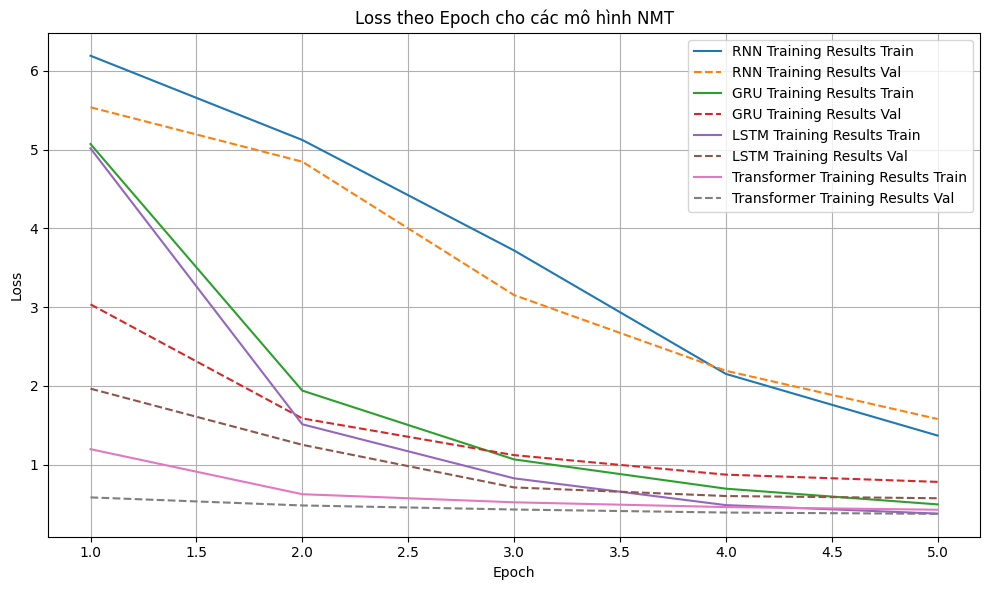

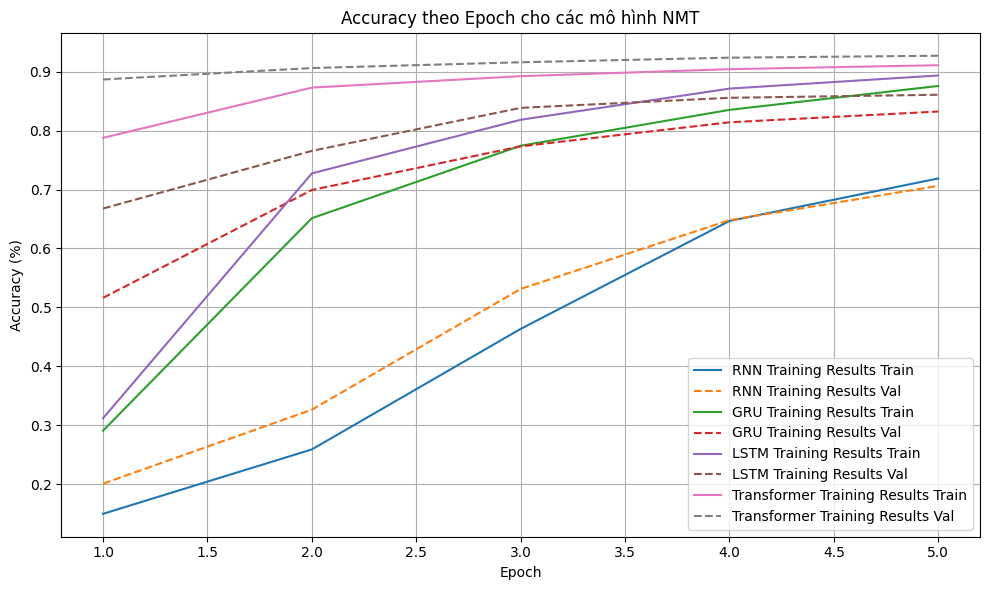

In [5]:
# Hàm vẽ biểu đồ Loss hoặc Accuracy
def plot_metric(metric_train, metric_val, ylabel, title):
    plt.figure(figsize=(10, 6))
    for name, df in data.items():
        plt.plot(df['Epoch'], df[metric_train], label=f"{name} Train", linestyle='-')
        plt.plot(df['Epoch'], df[metric_val], label=f"{name} Val", linestyle='--')
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ Loss
graph_title_loss = "Loss theo Epoch cho các mô hình NMT"
plot_metric("Train Loss", "Val Loss", "Loss", graph_title_loss)

# Vẽ biểu đồ Accuracy
graph_title_acc = "Accuracy theo Epoch cho các mô hình NMT"
plot_metric("Train Accuracy", "Val Accuracy", "Accuracy (%)", graph_title_acc)

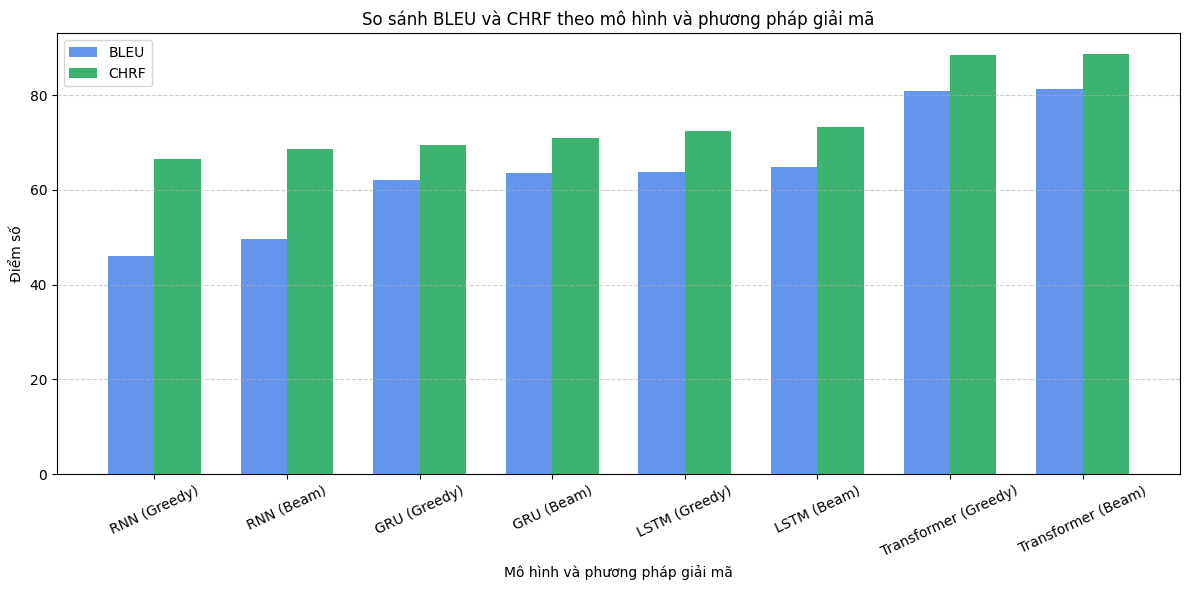

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file CSV từ đường dẫn trên Kaggle
file_path = '/kaggle/input/nmt-results-rnn-gru-lstm-transformer/evaluation_results.csv'
metrics_df = pd.read_csv(file_path)

# Vẽ biểu đồ BLEU và CHRF cho từng mô hình và phương pháp giải mã
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(metrics_df))

labels = [f"{row['Model']} ({row['Decoding']})" for _, row in metrics_df.iterrows()]

plt.bar(index, metrics_df['BLEU'], bar_width, label='BLEU', color='cornflowerblue')
plt.bar([i + bar_width for i in index], metrics_df['CHRF'], bar_width, label='CHRF', color='mediumseagreen')

plt.xlabel('Mô hình và phương pháp giải mã')
plt.ylabel('Điểm số')
plt.title('So sánh BLEU và CHRF theo mô hình và phương pháp giải mã')
plt.xticks([i + bar_width / 2 for i in index], labels, rotation=25)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
